## ATARI Asteroids DQN_gym with keras-rl

In [1]:
import numpy as no
import gym
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.agents.ddpg import DDPGAgent
from rl.policy import BoltzmannQPolicy , LinearAnnealedPolicy , EpsGreedyQPolicy
from rl.memory import SequentialMemory

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
ENV_NAME_2 = 'Asteroids-v0'

In [3]:
# Get the environment and extract the number of actions
env = gym.make(ENV_NAME_2)
nb_actions = env.action_space.n
nb_actions

14

In [4]:
# Next, we build a neural network model
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(3, activation= 'tanh')) # One layer of 3 units with tanh activation function 
model.add(Dense(nb_actions))
model.add(Activation('sigmoid')) # one layer of 1 unit with sigmoid activation function
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 100800)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 302403    
_________________________________________________________________
dense_2 (Dense)              (None, 14)                56        
_________________________________________________________________
activation_1 (Activation)    (None, 14)                0         
Total params: 302,459
Trainable params: 302,459
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
#DQN -- Deep Reinforcement Learning 

#Configure and compile the agent. 
#Use every built-in Keras optimizer and metrics!
memory = SequentialMemory(limit=20000, window_length=1)
policy = BoltzmannQPolicy()
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
              target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae', 'acc'])

In [6]:
## Visualize the training during 500000 steps 
dqn.fit(env, nb_steps=500000, visualize=True, verbose=2)

Training for 100000 steps ...


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/rl/memory.py:29: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


  1455/100000: episode: 1, duration: 46.233s, episode steps: 1455, steps per second: 31, episode reward: 1350.000, mean reward: 0.928 [0.000, 100.000], mean action: 6.509 [0.000, 13.000], mean observation: 2.139 [0.000, 240.000], loss: 21.742520, mean_absolute_error: 0.748284, acc: 0.079748, mean_q: 0.865032
  2423/100000: episode: 2, duration: 30.502s, episode steps: 968, steps per second: 32, episode reward: 630.000, mean reward: 0.651 [0.000, 100.000], mean action: 6.411 [0.000, 13.000], mean observation: 2.337 [0.000, 240.000], loss: 36.164433, mean_absolute_error: 0.916387, acc: 0.075252, mean_q: 0.964510
  3192/100000: episode: 3, duration: 23.303s, episode steps: 769, steps per second: 33, episode reward: 780.000, mean reward: 1.014 [0.000, 100.000], mean action: 6.113 [0.000, 13.000], mean observation: 1.996 [0.000, 240.000], loss: 32.863270, mean_absolute_error: 0.941716, acc: 0.073716, mean_q: 0.978775
  4037/100000: episode: 4, duration: 25.042s, episode steps: 845, steps pe

 35502/100000: episode: 28, duration: 51.162s, episode steps: 1732, steps per second: 34, episode reward: 1760.000, mean reward: 1.016 [0.000, 100.000], mean action: 6.483 [0.000, 13.000], mean observation: 1.864 [0.000, 240.000], loss: 29.654802, mean_absolute_error: 0.986030, acc: 0.069302, mean_q: 0.999999
 36281/100000: episode: 29, duration: 23.153s, episode steps: 779, steps per second: 34, episode reward: 610.000, mean reward: 0.783 [0.000, 100.000], mean action: 6.589 [0.000, 13.000], mean observation: 2.412 [0.000, 240.000], loss: 27.241671, mean_absolute_error: 0.980745, acc: 0.069480, mean_q: 0.999999
 37151/100000: episode: 30, duration: 25.850s, episode steps: 870, steps per second: 34, episode reward: 830.000, mean reward: 0.954 [0.000, 100.000], mean action: 6.493 [0.000, 13.000], mean observation: 2.012 [0.000, 240.000], loss: 28.615261, mean_absolute_error: 0.984251, acc: 0.071480, mean_q: 0.999999
 38717/100000: episode: 31, duration: 46.353s, episode steps: 1566, ste

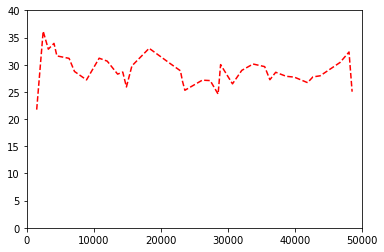

In [24]:
#Plot loss variations 
import matplotlib.pyplot as plt
episodes = [1455,2423,3192,4037,4472,6292,7098,8897,
            10784,11988,13541,14309,14855,15676,17303,18249,
            21461,22917,23238,23586,26189,27369,28548,28919,
           30695,32084,33770,35502,36281,37151,38717,39922,
           41911,42709,43787,46754,48099,48561]

loss = [21.74,36.16,32.86,33.93,31.62,31.17,28.76,27.21,31.20,
        30.66,28.269,28.651,25.91,29.79,31.83,33.02,30.15,28.89,
        26.92,25.30,27.16,27.08,24.59,30.02,26.48,28.96,30.13,
        29.65,27.24,28.61,27.87,27.72,26.7,27.76,27.96,30.41,32.34,25.04]

plt.plot(episodes, loss, 'r--')
plt.axis([0, 50000, 0, 40])
plt.show()

In [13]:
## Save the model 
dqn.save_weights('dqn_{}_weights.h5f'.format(ENV_NAME_2), overwrite=True)

In [14]:
# Evaluate the algorithm for 10 episodes 
dqn.test(env, nb_episodes=10, visualize=True)

Testing for 10 episodes ...
Episode 1: reward: 110.000, steps: 726
Episode 2: reward: 130.000, steps: 604
Episode 3: reward: 210.000, steps: 613
Episode 4: reward: 110.000, steps: 922
Episode 5: reward: 110.000, steps: 622
Episode 6: reward: 260.000, steps: 571
Episode 7: reward: 130.000, steps: 612
Episode 8: reward: 260.000, steps: 567
Episode 9: reward: 260.000, steps: 576
Episode 10: reward: 260.000, steps: 578


In [25]:
### Another Policy with dqn 

In [26]:
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr="eps", value_max=.8, value_min=.01,
                              value_test=.0,
                              nb_steps=100000)
dqn = DQNAgent(model=model, nb_actions=nb_actions,  nb_steps_warmup=10, 
               policy=policy, test_policy=policy, memory = memory,
               target_model_update=1e-2)

In [27]:
dqn.compile(Adam(lr=1e-3), metrics=['mae', 'acc'])

In [28]:
dqn.fit(env, nb_steps=50000, visualize=True, verbose=2)

Training for 50000 steps ...
  2647/50000: episode: 1, duration: 78.745s, episode steps: 2647, steps per second: 34, episode reward: 1180.000, mean reward: 0.446 [0.000, 100.000], mean action: 5.080 [0.000, 13.000], mean observation: 1.496 [0.000, 240.000], loss: 29.992819, mean_absolute_error: 0.987530, acc: 0.366749, mean_q: 1.000000, mean_eps: 0.789505
  5062/50000: episode: 2, duration: 70.523s, episode steps: 2415, steps per second: 34, episode reward: 1390.000, mean reward: 0.576 [0.000, 100.000], mean action: 4.961 [0.000, 13.000], mean observation: 2.056 [0.000, 240.000], loss: 29.211633, mean_absolute_error: 0.985632, acc: 0.362526, mean_q: 1.000000, mean_eps: 0.769553
  6988/50000: episode: 3, duration: 56.540s, episode steps: 1926, steps per second: 34, episode reward: 1410.000, mean reward: 0.732 [0.000, 100.000], mean action: 4.895 [0.000, 13.000], mean observation: 2.147 [0.000, 240.000], loss: 30.044086, mean_absolute_error: 0.987133, acc: 0.360965, mean_q: 1.000000, mea

 32370/50000: episode: 26, duration: 12.899s, episode steps: 439, steps per second: 34, episode reward: 230.000, mean reward: 0.524 [0.000, 50.000], mean action: 3.752 [0.000, 13.000], mean observation: 3.075 [0.000, 240.000], loss: 31.779249, mean_absolute_error: 0.992009, acc: 0.407247, mean_q: 1.000000, mean_eps: 0.546015
 34069/50000: episode: 27, duration: 49.556s, episode steps: 1699, steps per second: 34, episode reward: 1370.000, mean reward: 0.806 [0.000, 100.000], mean action: 3.727 [0.000, 13.000], mean observation: 1.739 [0.000, 240.000], loss: 32.917870, mean_absolute_error: 0.994308, acc: 0.397752, mean_q: 1.000000, mean_eps: 0.537570
 35248/50000: episode: 28, duration: 34.380s, episode steps: 1179, steps per second: 34, episode reward: 930.000, mean reward: 0.789 [0.000, 100.000], mean action: 3.759 [0.000, 13.000], mean observation: 2.046 [0.000, 240.000], loss: 31.251266, mean_absolute_error: 0.990669, acc: 0.407125, mean_q: 1.000000, mean_eps: 0.526202
 36460/50000: 

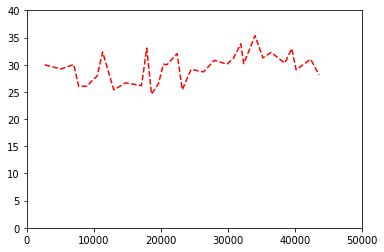

In [31]:
episodes_p2 = [2647,5062,6988,7721,9006,9489,
               10482,11303,12967,14767,17088,17370,17887,18599,19641,
               20361,20921,22419,23198,24514,26366,27983,29873,
               30851,31931,32370,34069,35248,36460,38501,39551,
               40200,42374,43610]

loss_p2 = [29.99,29.21,30.04,26.03,26.04,26.78,27.92,32.33,25.37,26.68,26.14,28.39,
           33.06,24.59,26.5,30.07,30.02,32.05,25.4,29.14,28.68,30.82, 30.10,31.20,
           33.85,30.20,35.34,31.25,32.28,30.29,32.97,29.07,31.01,28.14]

plt.plot(episodes_p2, loss_p2, 'r--')
plt.axis([0, 50000, 0, 40])
plt.show()

In [ ]:
dqn.test(env, nb_episodes=10, visualize=True)

In [ ]:
#SARSA Agent -- Reinforcement Learning 
from rl.agents.sarsa import SARSAAgent
sarsa = SARSAAgent(model, nb_actions, 
                policy=None, test_policy=None, 
                gamma=0.99, nb_steps_warmup=10, 
                train_interval=1)
sarsa.compile(Adam(lr=1e-3), metrics=['mae', 'acc'])
sarsa.fit(env, nb_steps=50000, visualize=True, verbose=2)
sarsa.test(env, nb_episodes=10, visualize=True)